# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

649

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Save config information:
url='http://api.openweathermap.org/data/2.5/weather?'
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

In [9]:
# Set up lists to hold response info:
name=[]         
cloud=[]        
ctry=[]         
date=[]         
humi=[]         
lat=[]          
lng=[]          
maxtemp=[]      
wind=[]         

# Loop through the list of cities and perform a request for data on each and add data to corresponding lists:

count=1 # Set counter to start value 1 for printouts of the current set count.

print('Beginning Data Retrieval')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        # For ignoreing errors in response.
        try:                                                
            name.append(response['name'])
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humi.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            
            # In case one of the responses comes back with error "KeyError", for missing values.
            print(city + ' city not found. Skipping...') 
                                                                
        count=count+1


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 649 | baykit
Processing Record 2 of 649 | ryotsu
Processing Record 3 of 649 | kaitangata
Processing Record 4 of 649 | bluff
Processing Record 5 of 649 | mataura
Processing Record 6 of 649 | hermanus
Processing Record 7 of 649 | sungaipenuh
Processing Record 8 of 649 | torbay
Processing Record 9 of 649 | san patricio
Processing Record 10 of 649 | bengkulu
Processing Record 11 of 649 | victoria
Processing Record 12 of 649 | naze
Processing Record 13 of 649 | ambur
Processing Record 14 of 649 | sawtell
Processing Record 15 of 649 | barrow
Processing Record 16 of 649 | new norfolk
Processing Record 17 of 649 | illoqqortoormiut
illoqqortoormiut city not found. Skipping...
Processing Record 18 of 649 | jumla
Processing Record 19 of 649 | saryshagan
saryshagan city not found. Skipping...
Processing Record 20 of 649 | igarka
Processing Record 21 of 649 | tuktoyaktuk
Processing Record 22 of 649 | punta arenas
Processi

Processing Record 195 of 649 | ahuimanu
Processing Record 196 of 649 | inhambane
Processing Record 197 of 649 | kloulklubed
Processing Record 198 of 649 | carnarvon
Processing Record 199 of 649 | shinshiro
Processing Record 200 of 649 | mahebourg
Processing Record 201 of 649 | ribeira grande
Processing Record 202 of 649 | port-de-paix
port-de-paix city not found. Skipping...
Processing Record 203 of 649 | uwajima
Processing Record 204 of 649 | chicama
Processing Record 205 of 649 | bowen
Processing Record 206 of 649 | myaundzha
Processing Record 207 of 649 | kansanshi
Processing Record 208 of 649 | arraial do cabo
Processing Record 209 of 649 | komsomolskiy
Processing Record 210 of 649 | tsihombe
tsihombe city not found. Skipping...
Processing Record 211 of 649 | lasa
Processing Record 212 of 649 | muros
Processing Record 213 of 649 | salalah
Processing Record 214 of 649 | ancud
Processing Record 215 of 649 | ampanihy
Processing Record 216 of 649 | codrington
Processing Record 217 of 6

Processing Record 377 of 649 | los llanos de aridane
Processing Record 378 of 649 | hay river
Processing Record 379 of 649 | severo-kurilsk
Processing Record 380 of 649 | jalu
Processing Record 381 of 649 | bulgan
Processing Record 382 of 649 | skibbereen
Processing Record 383 of 649 | noumea
Processing Record 384 of 649 | qaqortoq
Processing Record 385 of 649 | aykhal
Processing Record 386 of 649 | fairbanks
Processing Record 387 of 649 | mehran
Processing Record 388 of 649 | poieni
Processing Record 389 of 649 | antofagasta
Processing Record 390 of 649 | ruteng
Processing Record 391 of 649 | iroquois falls
Processing Record 392 of 649 | uhlove
Processing Record 393 of 649 | kyabram
Processing Record 394 of 649 | tumannyy
tumannyy city not found. Skipping...
Processing Record 395 of 649 | cherskiy
Processing Record 396 of 649 | kalmunai
Processing Record 397 of 649 | ust-kuyga
Processing Record 398 of 649 | mayo
Processing Record 399 of 649 | severnyy-kospashskiy
Processing Record 400

Processing Record 567 of 649 | lubu
Processing Record 568 of 649 | santa rosa
Processing Record 569 of 649 | kastamonu
Processing Record 570 of 649 | pizarro
Processing Record 571 of 649 | mospyne
Processing Record 572 of 649 | ghorawal
Processing Record 573 of 649 | warrnambool
Processing Record 574 of 649 | cockburn town
Processing Record 575 of 649 | shelburne
Processing Record 576 of 649 | yongan
Processing Record 577 of 649 | bucerias
Processing Record 578 of 649 | laibin
Processing Record 579 of 649 | raudeberg
Processing Record 580 of 649 | serro
Processing Record 581 of 649 | kegums
Processing Record 582 of 649 | nabire
Processing Record 583 of 649 | san cristobal
Processing Record 584 of 649 | kolda
Processing Record 585 of 649 | wangaratta
Processing Record 586 of 649 | bokspits
bokspits city not found. Skipping...
Processing Record 587 of 649 | lamu
Processing Record 588 of 649 | ponta pora
Processing Record 589 of 649 | key biscayne
Processing Record 590 of 649 | xai-xai
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Create a data frame from api call list:
weather_dict = {
    'City': name,
    'Country': ctry,
    'Date': date,
    'Lat': lat,
    'Lng': lng,
    'Cloudiness (%)': cloud,
    'Humidity (%)': humi,
    'Max Temp (F)': maxtemp,
    'Wind Speed (mph)': wind
}

weather_data=pd.DataFrame(weather_dict)

weather_data.head()

,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Baykit,RU,1667600675,61.6700,96.3700,92,99,7.95,2.55
1,Ryōtsu-minato,JP,1667600428,38.0833,138.4333,81,59,51.67,9.40
2,Kaitangata,NZ,1667600675,-46.2817,169.8464,83,76,47.89,12.84
3,Bluff,NZ,1667600676,-46.6000,168.3333,95,63,50.22,24.76
4,Mataura,NZ,1667600676,-46.1927,168.8643,97,70,49.17,10.16


In [18]:
# Export the weather_data into .csv file path specified with output_data_file:

weather_data.to_csv ('WeatherPy.csv', index = False, header=True)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
humidity_condition = weather_data["Humidity (%)"]>100
weather_data[humidity_condition]

,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)


In [29]:
humidity_condition = weather_data.describe(include = "all")

humidity_condition.drop(['unique','top', 'freq'], axis=0, inplace=True)


humidity_condition.drop(['City','Country'], axis=1, inplace=True)
humidity_condition

,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
count,5.900000e+02,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,1.667601e+09,21.167772,22.291805,57.845763,72.928814,56.732186,7.325390
std,7.151002e+01,33.117100,91.109769,39.742955,20.610010,23.080491,5.264374
min,1.667600e+09,-54.800000,-179.166700,0.000000,1.000000,-21.150000,0.000000
25%,1.667601e+09,-4.121225,-65.071125,13.000000,63.000000,42.527500,3.240000
50%,1.667601e+09,27.034900,28.849900,75.000000,77.000000,63.925000,6.005000
75%,1.667601e+09,47.672150,106.057275,98.750000,88.000000,74.692500,10.237500
max,1.667601e+09,78.218600,178.416700,100.000000,100.000000,91.810000,30.560000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

/var/folders/s8/ckw34dld6_v_dmrcdfrhhlwr0000gn/T/ipykernel_80220/3453831302.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


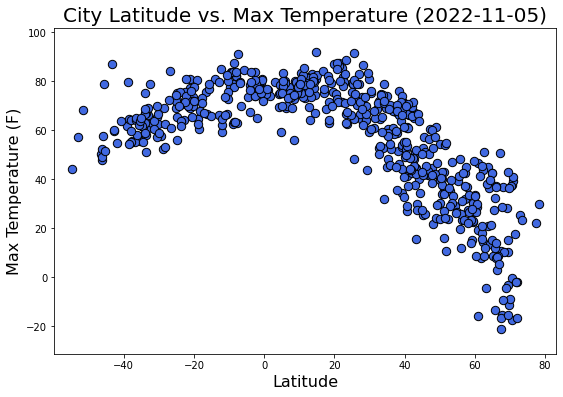

In [44]:
# Build a scatter plot for all cities vs max. temp.:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Max Temp (F)'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['Max Temp (F)'])-10, max(weather_data['Max Temp (F)'])+10)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure:
plt.savefig('Images/City Latitude vs. MaxTemp.png')

# Show plot:
plt.show()

## Latitude vs. Humidity Plot

/var/folders/s8/ckw34dld6_v_dmrcdfrhhlwr0000gn/T/ipykernel_80220/4155718372.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


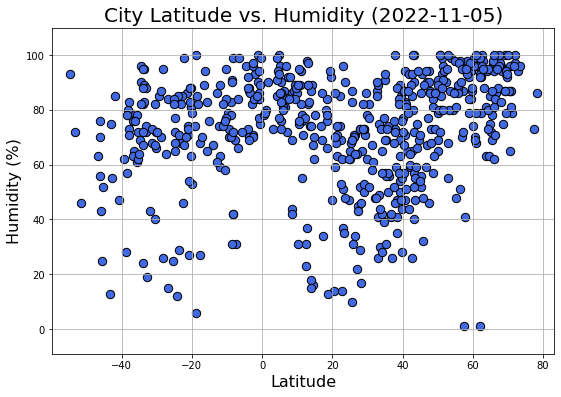

In [53]:
# Build a scatter plot for all cities vs humidity level:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Humidity (%)'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['Humidity (%)'])-10, max(weather_data['Humidity (%)'])+10)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)
plt.grid(True)

# Save the figure:
plt.savefig('ImagesCity Latitude vs. Humidity.png')

# Show plot:
plt.show()

## Latitude vs. Cloudiness Plot

/var/folders/s8/ckw34dld6_v_dmrcdfrhhlwr0000gn/T/ipykernel_80220/349347211.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


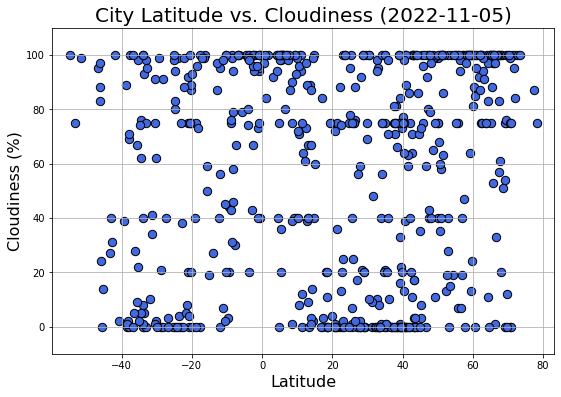

In [54]:
# Build a scatter plot for all cities vs cloudiness level:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Cloudiness (%)'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['Cloudiness (%)'])-10, max(weather_data['Cloudiness (%)'])+10)
plt.grid(True)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure
plt.savefig('Images/City Latitude vs. Cloudiness.png')

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

/var/folders/s8/ckw34dld6_v_dmrcdfrhhlwr0000gn/T/ipykernel_80220/1892362863.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


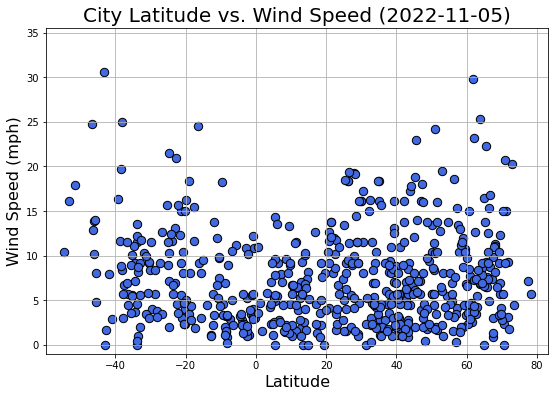

In [55]:
# Build a scatter plot for all cities vs wind speed:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Wind Speed (mph)'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['Wind Speed (mph)'])-1, max(weather_data['Wind Speed (mph)'])+5)
plt.grid(True)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure
plt.savefig('Images/City Latitude vs. Wind.png')

# Show plot
plt.show()

## Linear Regression

In [61]:
# Northern hemisphere (lat >= 0 degree) dataframe
weather_data_north = weather_data.loc[weather_data['Lat'] >= 0]


# Southern hemisphere (lat < 0 degree) dataframe
weather_data_south = weather_data.loc[weather_data['Lat'] < 0]

weather_data_north

,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Baykit,RU,1667600675,61.6700,96.3700,92,99,7.95,2.55
1,Ryōtsu-minato,JP,1667600428,38.0833,138.4333,81,59,51.67,9.40
7,Torbay,CA,1667600677,47.6666,-52.7314,40,94,44.49,8.05
8,San Patricio,US,1667600677,28.0170,-97.5169,59,73,86.54,19.30
10,Hong Kong,HK,1667600678,22.2855,114.1577,88,85,71.33,11.99
...,...,...,...,...,...,...,...,...,...
582,Talisay City,PH,1667600813,10.2447,123.8494,40,89,78.82,5.75
585,Ontario,US,1667600814,34.0633,-117.6509,75,28,71.73,10.36
586,Kargasok,RU,1667600814,59.0556,80.8572,100,84,27.73,8.70
587,Schwabach,DE,1667600814,49.3292,11.0256,75,86,46.51,2.30


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.07x + 93.44
The r-value is: -0.8452489892810379
The regression indicates a moderate negative linear relationship between the dataset
In this hemisphere, the more steps you take away from the equator,the more the temperature decreases


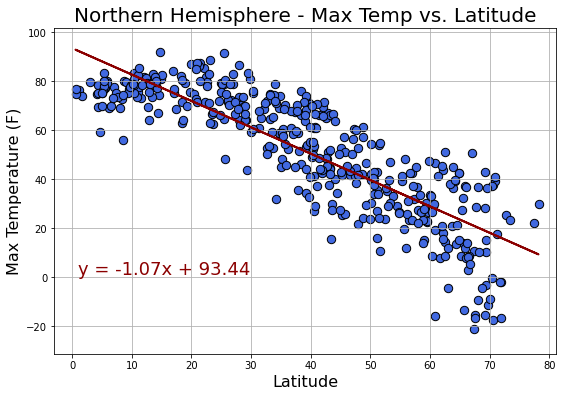

In [63]:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Max Temp (F)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(min(weather_data['Max Temp (F)'])-10, max(weather_data['Max Temp (F)'])+10)

# Set the limits of the x axis:
plt.xlim(-3, max(weather_data['Lat'])+3)
plt.grid(True)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print("The regression indicates a moderate negative linear relationship between the dataset")
print("In this hemisphere, the more steps you take away from the equator,the more the temperature decreases")

# Save the figure:
plt.savefig('Images/City Latitude vs. MaxTemp_North.png')

# Show plot:
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.07x + 93.44
The r-value is: 0.6615570929858375
The regression indicate a strong positive linear relationship between the dataset
In this hemisphere, the closer you to the equator, the higher the temperature


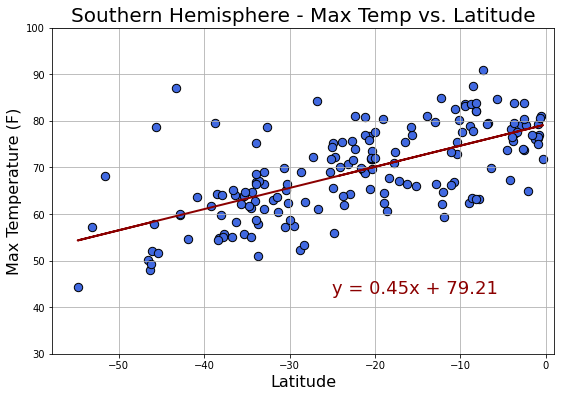

In [65]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Max Temp (F)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-25,43),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(30, 100)
plt.grid(True)

print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print("The regression indicate a strong positive linear relationship between the dataset")
print("In this hemisphere, the closer you to the equator, the higher the temperature")


# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-3, +1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Images/City Latitude vs. MaxTemp_South.png')

# Show plot:
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.27x + 63.09
The r-value is: 0.2511129388306484
The regression indicates a very weak positive linear relationship
There is no much of a correlation displayed between the dataset


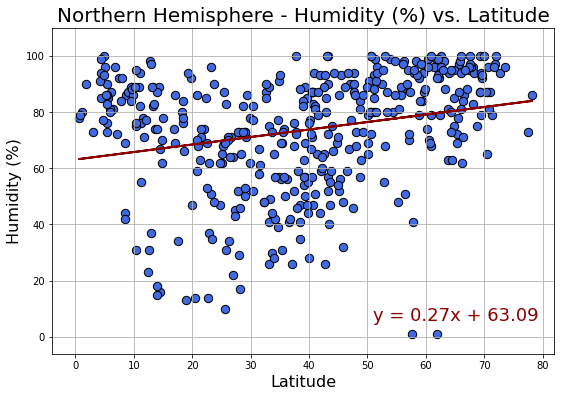

In [66]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Humidity (%)']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-4, 82)
plt.grid(True)
print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The regression indicates a very weak positive linear relationship")
print("There is no much of a correlation displayed between the dataset")

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Images/City Latitude vs. Humidity_North.png')

# Show plot:
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.41x + 80.45
The r-value is: 0.2813431014668222
The regression indicates a weak negative linear relationship
There is no much of a correlation displayed between the dataset


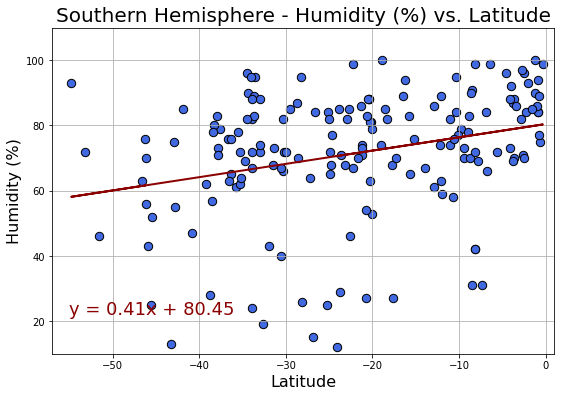

In [67]:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Humidity (%)']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,22), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(10, 110)

# Set the limits of the x axis:
plt.xlim(-57, 1)
plt.grid(True)

print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The regression indicates a weak negative linear relationship")
print("There is no much of a correlation displayed between the dataset")

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Images/City Latitude vs. Humidity_South.png')

# Show plot:
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.34x + 45.0
The r-value is: 0.16924079801439687
The regression indicates a very weak negative linear relationship
There is no much of a correlation displayed between the dataset


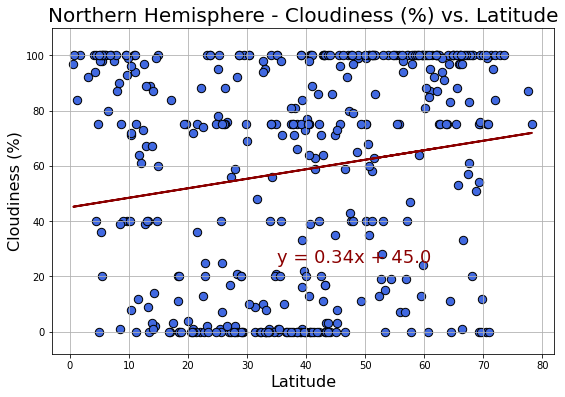

In [68]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Cloudiness (%)']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-8, 110)

# Set the limits of the x axis:
plt.xlim(-3, 82)
print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The regression indicates a very weak negative linear relationship")
print("There is no much of a correlation displayed between the dataset")

plt.grid(True)
# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Images/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.77x + 73.27
The r-value is: 0.27000086808907214
The regression indicates a very weak positive linear relationship
There is no much of a correlation displayed between the dataset


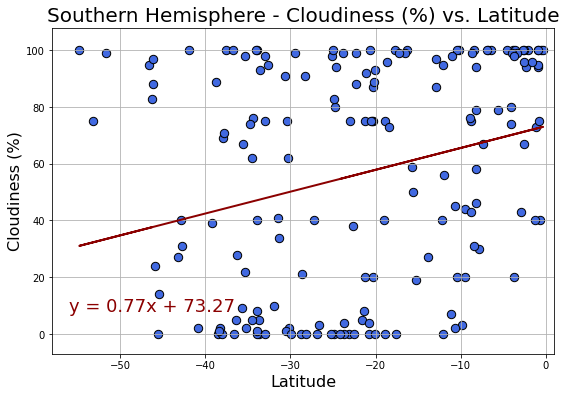

In [69]:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Cloudiness (%)']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-7, 108)
plt.grid(True)

# Set the limits of the x axis:
plt.xlim(-58, 1)

print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print("The regression indicates a very weak positive linear relationship")
print("There is no much of a correlation displayed between the dataset")
# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Images/City Latitude vs. Cloudiness_South.png')

# Show plot:
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 5.79
The r-value is: 0.1438161326407356
The regression indicates a very weak positive linear relationship
There is no much of a correlation displayed between the dataset


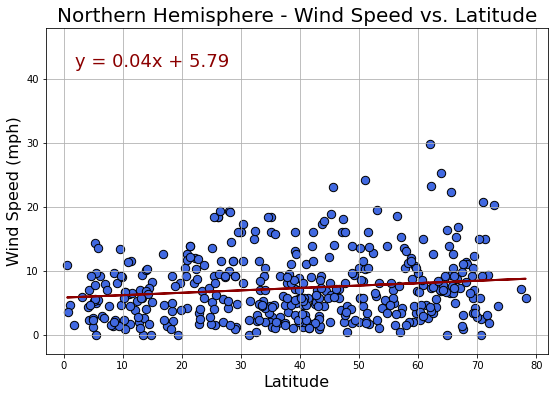

In [70]:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Wind Speed (mph)']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(2,42), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-3, 48)
print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print("The regression indicates a very weak positive linear relationship")
print("There is no much of a correlation displayed between the dataset")

# Set the limits of the x axis:
plt.xlim(-3, 82)
plt.grid(True)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Images/City Latitude vs. Wind_North.png')

# Show plot:
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.14x + 4.38
The r-value is: -0.3537871764180828
The regression indicates a very weak negative linear relationship
There is no much of a correlation displayed between the dataset


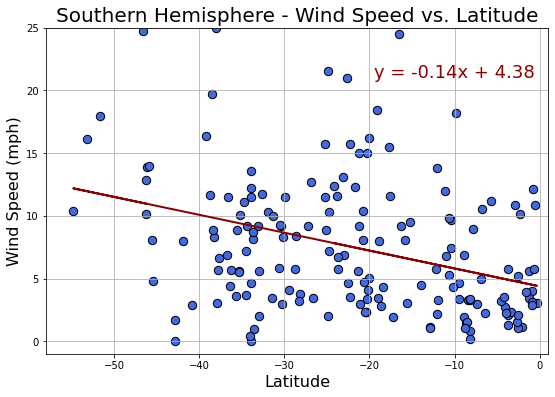

In [72]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Wind Speed (mph)']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-1, 25)

# Set the limits of the x axis:
plt.xlim(-58, 1)

plt.grid(True)
print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The regression indicates a very weak negative linear relationship")
print("There is no much of a correlation displayed between the dataset")
# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Images/City Latitude vs. Wind_South.png')

# Show plot:
plt.show()